In [ ]:
from mysql.connector import connect
import pandas as pd
import seaborn as sns

In [ ]:
#connect database
def connect_database(database):
  db = connect(
    host="",
    user="",
    password="",
    database= database
  )

  return db

In [ ]:
db = connect_database('imdb_movie')
print(db)

1. Menampilkan 5 direktur dengan jumlah film terbanyak dalam daftar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 5.

In [ ]:
db = connect_database('imdb_movie')

def most_maker_director(db):
    cursor_db = db.cursor()
    query = "select director_name, count(movie_title) from movies where director_name is not null group by 1 order by 2 desc;"
    cursor_db.execute(query)
    result1 = cursor_db.fetchmany(5)
    data1 = pd.DataFrame(result1, columns = ['Director Name', 'Count'])
    data1.index += 1
    return data1['Director Name'].to_string()

2. Menampilkan 10 direktur dengan total jumlah pendapatan terbesar untuk semua film yang dia buat. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 10 beserta total pendapatan dari masing-masing direktur.

Pendapatan bisa didapatkan dari nilai gross

In [ ]:
db = connect_database('imdb_movie')

def most_profitable_director(db):
    cursor_db = db.cursor()
    query1 = "select director_name, sum(gross)from movies where director_name is not null group by 1 order by 2 desc;"
    cursor_db.execute(query1)
    result2 = cursor_db.fetchmany(10)
    data2 = pd.DataFrame(result2, columns = ['Director Name', 'Count'])
    data2.index += 1
    return data2.to_string(header=False)

3. Menampilkan 15 film dengan pendapatan terbesar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 15 beserta pendapatan dari masing-masing film

In [ ]:
db = connect_database('imdb_movie')

def most_profitable_movie(db):
    cursor_db = db.cursor()
    query2 = "select movie_title,title_year,gross from movies group by 1 order by 3 desc;"
    cursor_db.execute(query2)
    result3 = cursor_db.fetchmany(15)
    data3 = pd.DataFrame(result3, columns = ['Movie Title', 'Title Year', 'Gross'])
    data3.index += 1
    return data3.to_string(header=False)

4. Menampilkan plot distribusi budget dari semua film pada tahun yang ditentukan. fungsi ini memiliki input, yaitu adalah tahun.

In [ ]:
db = connect_database('imdb_movie')

def budget_distribution(db, year):
    cursor_db = db.cursor()
    query3 ='''
    select director_name, 
    count(budget)
    from movies 
    where title_year = 2001
    group by 1 order by 2 DESC;
    '''
    cursor_db.execute(query3)
    result4 = cursor_db.fetchall()
    data4 = pd.DataFrame(result4, columns = ['Director Name', 'Count'])
    data4.index += 1
    count = list(data4['Count'])
    return count

Semua sel di bawah digunakan untuk pemanggilan fungsi dan menunjukan hasil yang diharapkan.

In [ ]:
print(most_maker_director(db))

1    Steven Spielberg
2         Woody Allen
3     Martin Scorsese
4      Clint Eastwood
5        Ridley Scott


In [ ]:
print(most_profitable_director(db))

1    Steven Spielberg  4.114233e+09
2       Peter Jackson  2.592969e+09
3         Michael Bay  2.231243e+09
4          Tim Burton  2.071275e+09
5           Sam Raimi  2.049549e+09
6       James Cameron  1.948126e+09
7   Christopher Nolan  1.813228e+09
8        George Lucas  1.741418e+09
9         Joss Whedon  1.730887e+09
10    Robert Zemeckis  1.619309e+09


In [ ]:
print(most_profitable_movie(db))

1                                       Avatar   2009.0  760505847.0
2                                      Titanic   1997.0  658672302.0
3                               Jurassic World   2015.0  652177271.0
4                                 The Avengers   2012.0  623279547.0
5                              The Dark Knight   2008.0  533316061.0
6    Star Wars: Episode I - The Phantom Menace   1999.0  474544677.0
7           Star Wars: Episode IV - A New Hope   1977.0  460935665.0
8                      Avengers: Age of Ultron   2015.0  458991599.0
9                        The Dark Knight Rises   2012.0  448130642.0
10                                     Shrek 2   2004.0  436471036.0
11                  E.T. the Extra-Terrestrial   1982.0  434949459.0
12             The Hunger Games: Catching Fire   2013.0  424645577.0
13  Pirates of the Caribbean: Dead Man's Chest   2006.0  423032628.0
14                               The Lion King   1994.0  422783777.0
15                                

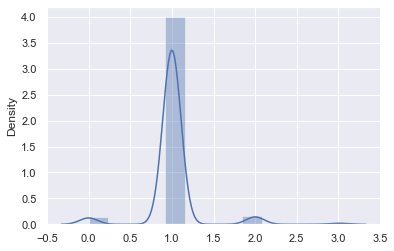

In [ ]:
year = 2001
count = budget_distribution(db, 2001)
sns.set_theme();
ax = sns.distplot(count)